#### Mario Enrique Pisquiy Gómez
##### Carné 20200399

### Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Importar el dataset

In [2]:
# Imporar el dataset Train
data = pd.read_csv('Train.csv', header = 0, skiprows=[2376])
# Tamaño del dataset
data.shape

(36194, 18)

In [3]:
# Visualización inicial de la data
data.head()

,id,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,city,day_type
0,1,210.365854,Entire home/apt,False,False,2,False,0,1,9,91,0,0.541022,0.427919,-9.13395,38.71038,lisbon,weekday
1,2,176.181721,Private room,False,True,2,False,1,0,9,89,1,3.032839,0.343492,2.14165,41.37011,barcelona,weekday
2,3,142.054140,Private room,False,True,2,True,0,0,10,98,1,11.909712,6.710909,0.00475,51.44025,london,weekend
3,4,428.744524,Entire home/apt,False,False,4,False,0,0,9,94,0,4.158390,0.145570,2.30179,48.87297,paris,weekend
4,5,220.279802,Entire home/apt,False,False,6,True,0,1,10,93,2,1.302190,0.369475,23.72468,37.96746,athens,weekend


In [4]:
# Verificar si hay NAs en la data
data.isna().sum()

id                            0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
lng                           0
lat                           0
city                          0
day_type                      0
dtype: int64

In [5]:
# Verificar los tipos de dato por variable en el dataset
data.dtypes

id                              int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating              int64
guest_satisfaction_overall      int64
bedrooms                        int64
dist                          float64
metro_dist                    float64
lng                           float64
lat                           float64
city                           object
day_type                       object
dtype: object

In [6]:
# Descripción estadística de la data
data.describe()

,id,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
count,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000
mean,18098.434381,279.386846,3.159391,0.293612,0.348980,9.389761,92.614218,1.157595,3.183128,0.676998,7.434832,45.659390
std,10448.558359,328.042369,1.294476,0.455423,0.476654,0.954591,8.917921,0.631141,2.383785,0.848039,9.810969,5.250253
min,1.000000,39.009259,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.003220,-9.225990,37.953000
25%,9050.250000,148.645200,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.452918,0.247775,-0.071540,41.398830
50%,18098.500000,211.230343,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.607930,0.412522,4.874190,47.506315
75%,27146.750000,319.051960,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,4.251491,0.732341,13.533010,51.469975
max,36195.000000,16445.614690,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,22.617458,13.314115,23.786020,52.641410


### Exploración de la data

#### Gráfica de puntos del dataset por tipo de habitación

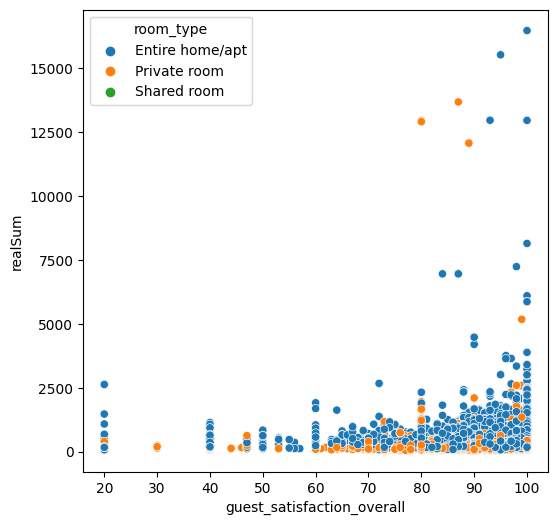

In [7]:
"""
Gráfica de puntos para ver la distribución de la data según las 
variables realSum y guest_satisfaction_overall 
codificado por colores según el tipo de cuarto
"""

plt.figure(figsize=(6,6))
sns.scatterplot(data=data, x='guest_satisfaction_overall', y='realSum', hue='room_type')
plt.show()

#### Pairplot de la data, se muestra en dos figuras por la cantidad de variables

<Figure size 2000x600 with 0 Axes>

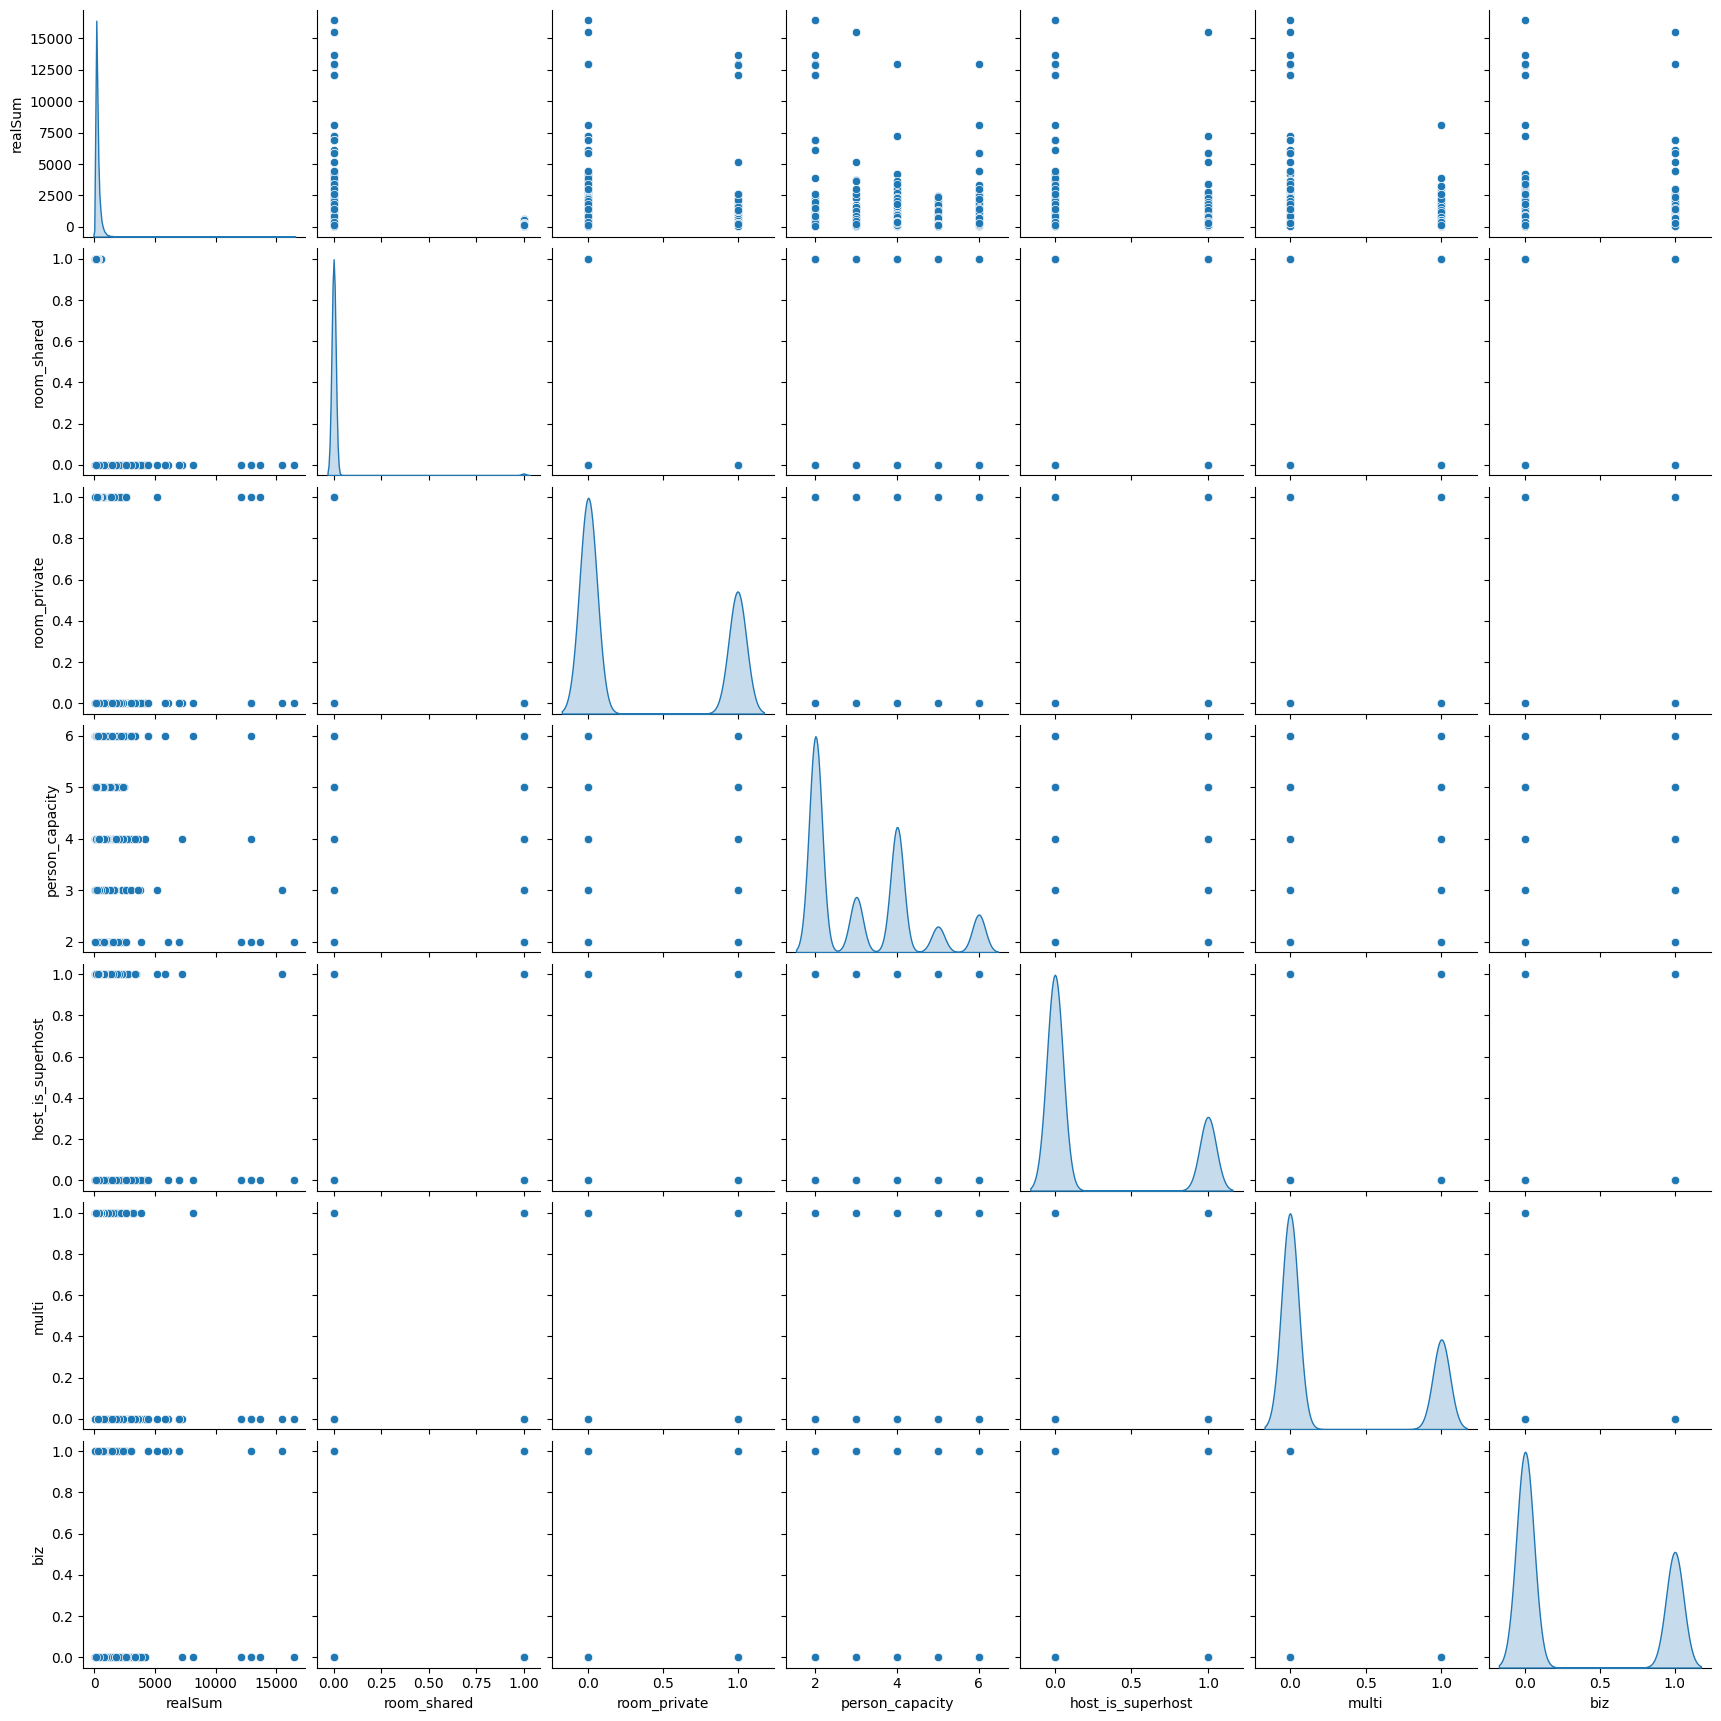

In [8]:
"""
Primer pairplot de la data

Se ve poca correlación de las variables por el tipo de variables 
que hay, principalmente categóricas, y que además son de tipo 
discreto
"""

data1 = data.iloc[:,1:9]
plt.figure(figsize=(20,6))
sns.pairplot(data=data1, diag_kind='kde')
plt.show()

<Figure size 2000x600 with 0 Axes>

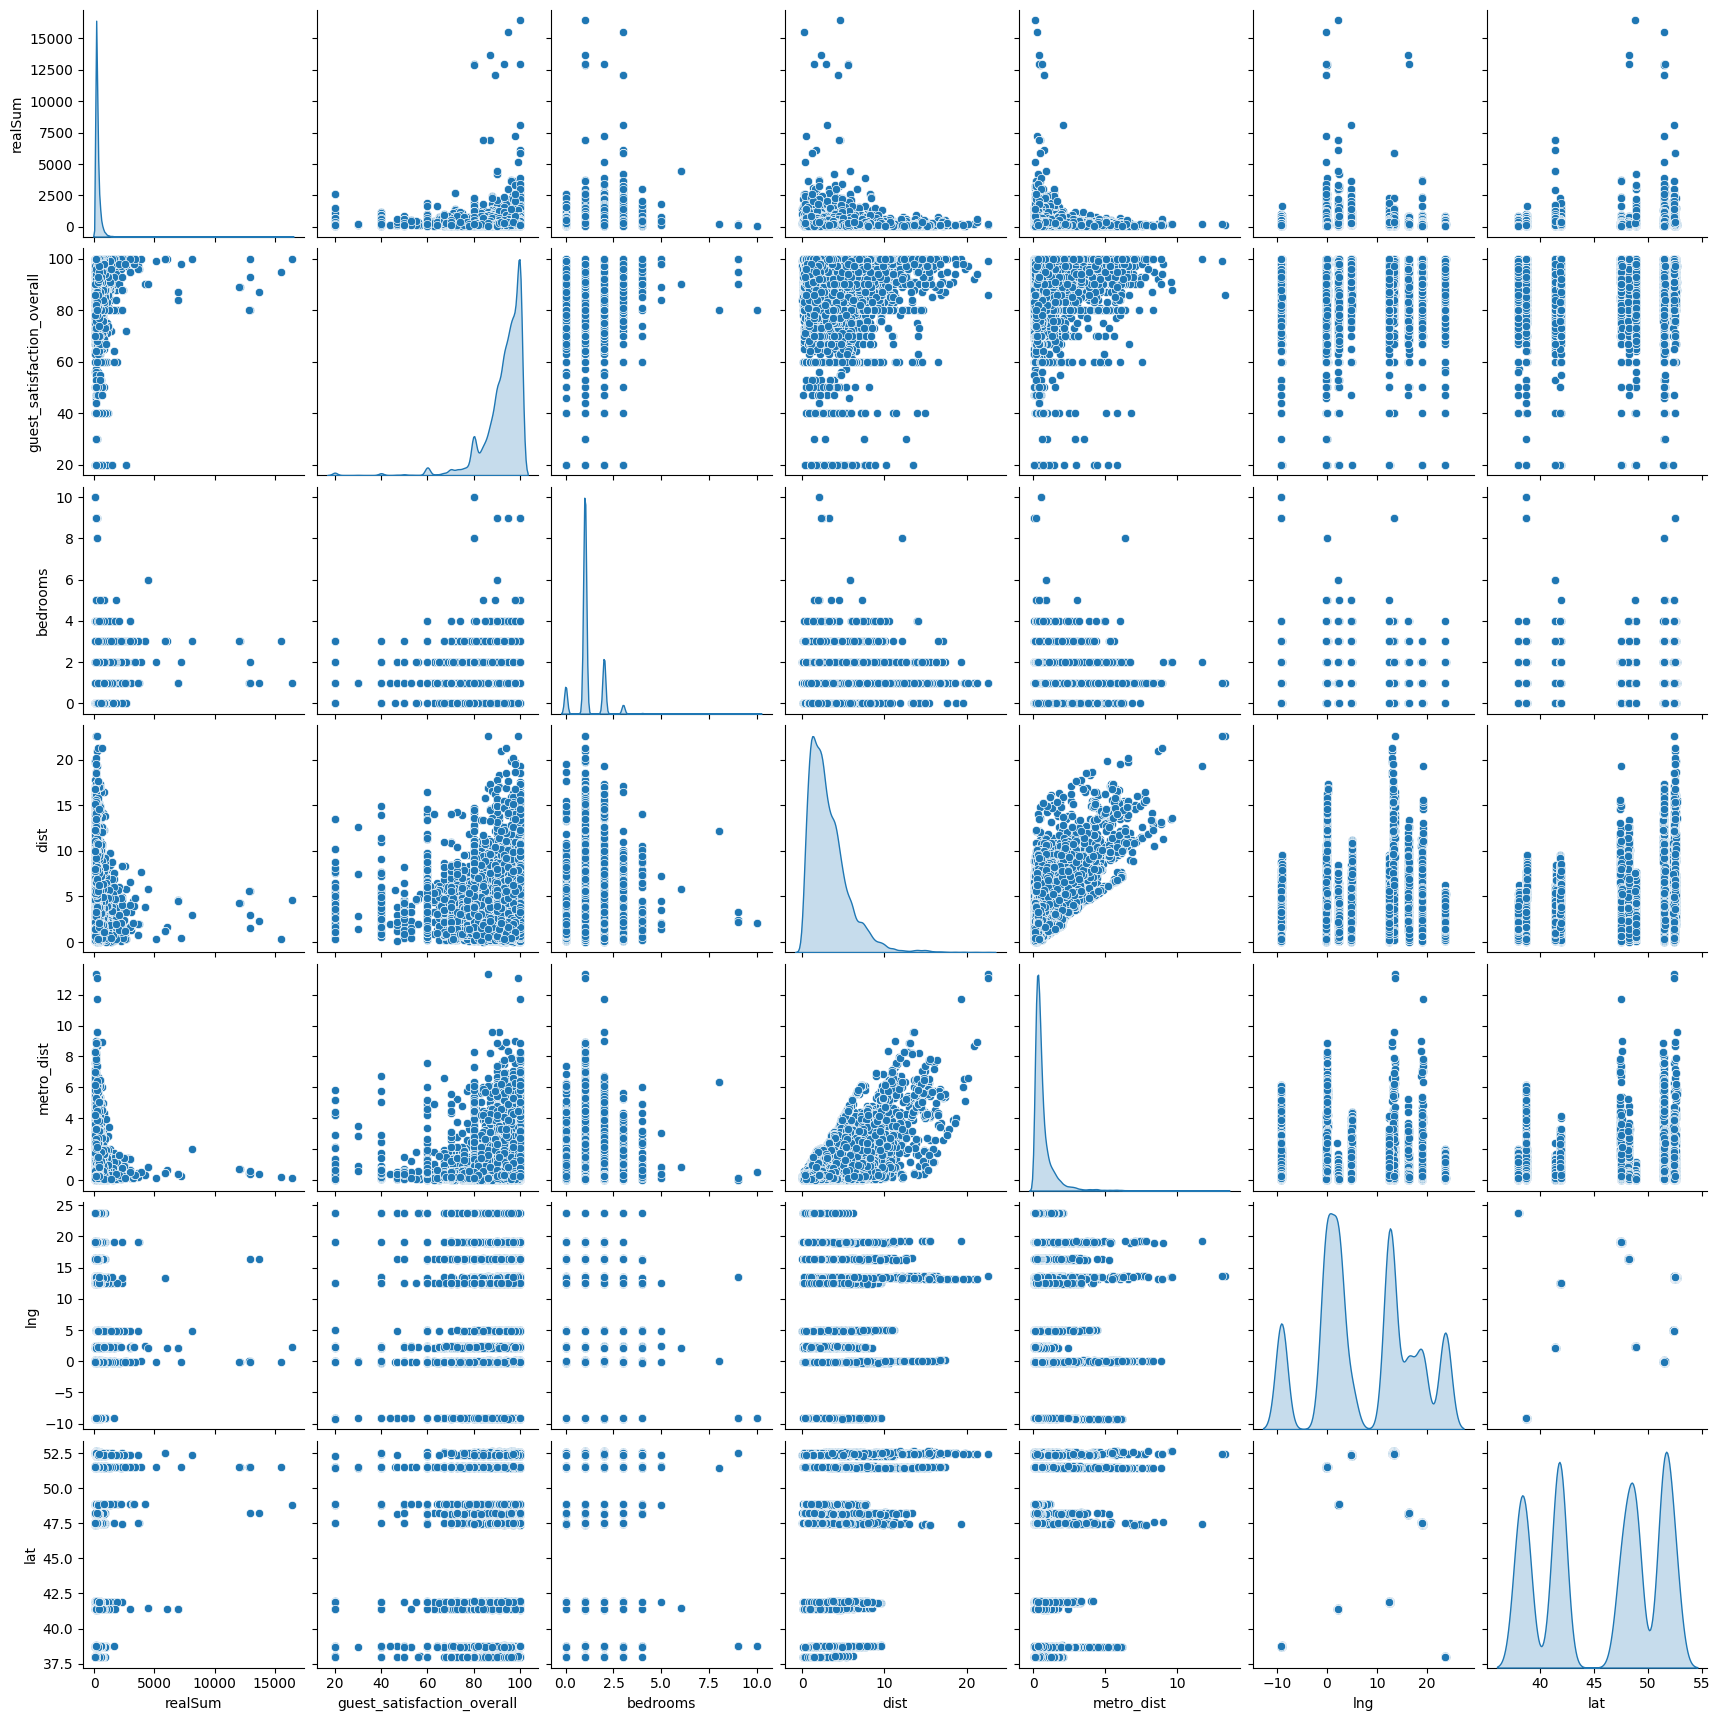

In [9]:
"""
Segundo pairplot de la data

Esta vez se puede ver una relación entre variables como dist y 
metro_dist en relación a la satisacción, pero más que esas no se 
ven más relaciones
"""
data1 = data.iloc[:,[1,10,11,12,13,14,15,16,17]]
plt.figure(figsize=(20,6))
sns.pairplot(data=data1, diag_kind='kde')
plt.show()

#### Matriz de correlación entre las variables

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8032\1343135908.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.imshow(data.corr(), vmin=-1, vmax=1, cmap=plt.cm.seismic)


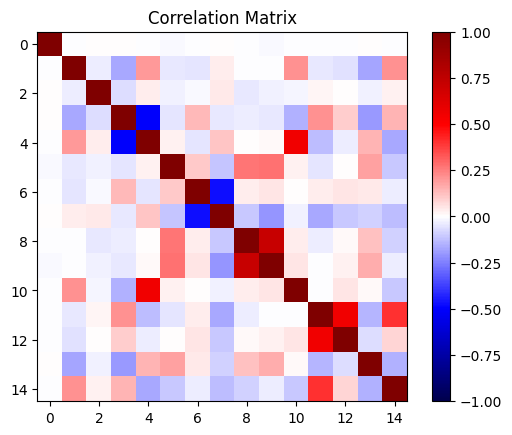

In [10]:
"""
Matriz de correlaciones de la data 

Se puede apreciar la poca correlación entre las variables numéricas
"""

data1 = data.iloc[:,1:]
data1 = data1.select_dtypes(include='number')
fig = plt.figure()
plt.imshow(data.corr(), vmin=-1, vmax=1, cmap=plt.cm.seismic)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

### Separar el dataset

In [11]:
# Se obtiene el objetivo 'y'
y = data.loc[:,'realSum']
# Se eliminan realSum e Id del dataset, porque no son útiles para el train
data.drop(['realSum'],axis=1,inplace=True)
data.drop(['id'],axis=1,inplace=True)

In [12]:
# Separación del dataset en Train y Valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size=0.3, random_state=20)

### Pipeline 

#### Variables Numericas

In [13]:
# Importación de librerías para crear los pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Creación del pipeline de variables numéricas, en este caso únicamente se realiza la normalización de la data para que tengan la misma escala
num_pipeline = Pipeline([
                            ('std_scaler', StandardScaler()),
                        ])

In [14]:
# Test del funcionamiento del pipeline de variables numéricas
df_num_tr = num_pipeline.fit_transform(data.select_dtypes(include='number'))
df_num_tr[0,:]

array([-0.89565733, -0.64471156,  1.3658293 , -0.40830698, -0.18101082,
       -1.83415651, -1.10838108, -0.29371493, -1.68882511, -1.32357536])

#### Variables categoricas

In [15]:
# Importación de la librería para el One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Creación del pipeline de variables categóricas, únicamente realizará el One Hot Encoding de dichas variables
cat_pipeline = Pipeline([
                        ('oh_enc', OneHotEncoder()),
                        ])

In [16]:
# Test del funcionamiento del pipeline de variables categóricas
df_cat_tr = cat_pipeline.fit_transform(data.select_dtypes(exclude='number'))
df_cat_tr.toarray()[0,:]

array([1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0.])

#### Pipeline Completo

In [17]:
# Importación de librería útil para realizar el pipeline completo
from sklearn.compose import ColumnTransformer

# Obtención de atributos de variables numéricas y categóricas
num_attribs = data.select_dtypes(include='number').columns
cat_attribs = data.select_dtypes(exclude='number').columns

# Creación del pipeline completo, unión de las pipelines de variables numéricas y categóricas
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [18]:
# Ejecución del pipeline para X_train
full_pipeline.fit(X_train)
X_train_processed = full_pipeline.transform(X_train)
X_train_processed[0,:]

array([-0.89433219, -0.64546835,  1.36647269, -0.40940374,  0.04198122,
       -0.24700926, -0.79763954, -0.32299744, -1.69119915, -1.31987981,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ])

In [19]:
# Importación de librerías para aplicar el modelo al pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# Se ensambla el pipeline creado anteriormente con el modelo
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("random_forest", BaggingRegressor(DecisionTreeRegressor(), n_estimators=1000, bootstrap=True, random_state=42, n_jobs=-1))
])

# Generación del modelo
full_pipeline_with_predictor.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['person_capacity', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'lng',
       'lat'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('oh_enc',
                                                                   OneHotEncoder())]),
                                                  Index(['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'city',
       'day_type'],
      dtype='object'))])),
                ('random_forest',
                 BaggingRegressor(estimator=DecisionTreeRegressor(),
                                  n_estimators=1000, n_jobs=-1,
                                  random_state=42))])

In [20]:
# Test del modelo y del pipeline
from sklearn.metrics import mean_squared_error

# predicciones del model en base a los X_valid y y_valid generados anteriormente
final_predictions = full_pipeline_with_predictor.predict(X_valid)

# calculo del valor del error promedio al cuadrado
final_mse = mean_squared_error(y_valid, final_predictions)
final_mse

95553.09106132858

In [21]:
# Creación del modelo para calcular el oob score
bag_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=1000, bootstrap=True, oob_score=True, random_state=42, n_jobs=-1)
bag_reg.fit(X_train_processed, y_train)
# Cálculo del oob score
print('Accuracy según la evaluación OOB:')
bag_reg.oob_score_

Accuracy based on OOB evaluation:


0.44055942855426355

### Testing del modelo

#### Importar el dataset

In [22]:
# Importar el dataset de Test
data_test = pd.read_csv('Test.csv')

In [23]:
# Se extraen los ids para armar el csv final
ids_solution = data_test.id
# Se elimina del dataset
data_test.drop('id',axis=1,inplace=True)

In [24]:
#preds_solution = simple_model.predict(X_test_processed)
preds_solution = full_pipeline_with_predictor.predict(data_test)

In [25]:
# Creación de un array vacío para generar el csv final
solution_array = []

# For que recorre el array de ids y de las predicciones realizadas para crear el array de soluciones
for i in range(0, len(ids_solution)):
    solution_array1 = [ids_solution[i],preds_solution[i]]
    solution_array.append(solution_array1)

In [26]:
# Transformación del array de soluciones a un dataframe de pandas
solution = pd.DataFrame(solution_array, columns = ['id','realSum'])
solution.head(3)

,id,realSum
0,36196,448.825869
1,36197,1002.136278
2,36198,1057.009555


In [27]:
# Generación del csv final
solution.to_csv('solutions.csv', index=False)